# Outliers e Eventos Especiais na Sazonalidade


Vamos tratar sobre o que são outliers e como tratá-los. Um outlier é qualquer ponto de dado que esteja significativamente afastado dos outros pontos. Assim, coo eventos especiais são dados que fogem do padrão habitual do seu dado. Esses valores discrepantes podem ser dados que tiveram algum problema durante a coleta ou mesmo durante o seu armazenamento. Esses valores discrepantes tendem a influenciar negativamente o modelo estatístico e, por isso é importante tratá-los. Um dos efeitos que o outlier possui no prophet é de mudar a sua sazonalidade. 

Vamos utilizar como exemplo a base do national geographic para explotar commo resolver esse problema. 

In [138]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
df = pd.read_csv('instagram_natgeo.csv')
display(df.head(5))
df['Date'] = pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']
df

,Date,Average Likes Per Photo
0,3/24/2012,1043.000000
1,3/25/2012,1707.666667
2,3/26/2012,1300.142857
3,3/27/2012,785.666667
4,3/28/2012,1376.200000


,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000


In [139]:
# abaixo vamos instanciar o modelo


In [140]:
model = Prophet(seasonality_mode='multiplicative',  yearly_seasonality=6)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 2)
future

19:26:14 - cmdstanpy - INFO - Chain [1] start processing
19:26:15 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2012-03-24
1,2012-03-25
2,2012-03-26
3,2012-03-27
4,2012-03-28
...,...
3439,2021-11-16
3440,2021-11-17
3441,2021-11-18
3442,2021-11-19


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


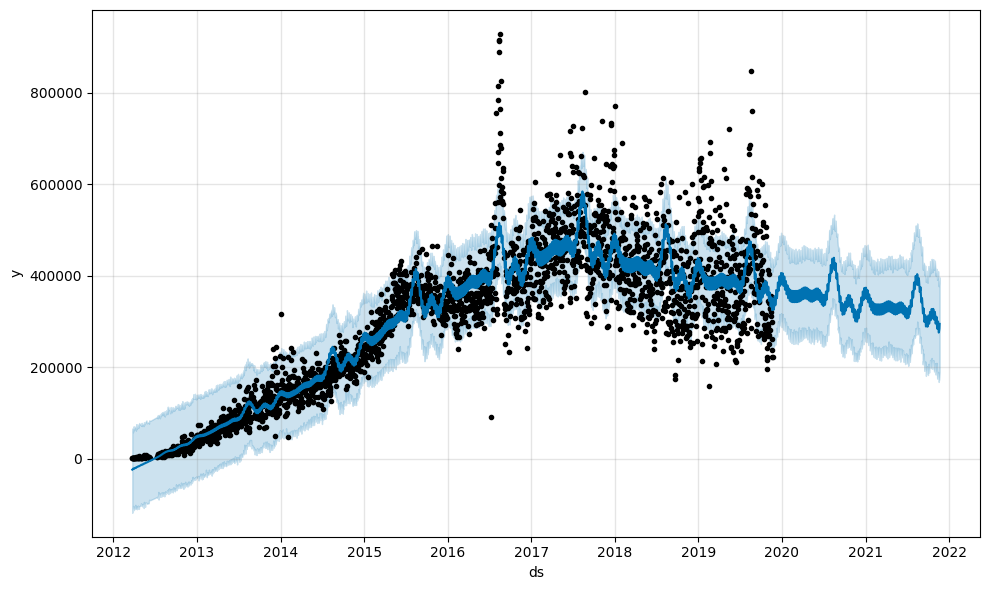

In [141]:
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()

## Na figura plotado, em agosto de 2015 temos aqui um evento muito atípico, com o número muito alto de curtidas. vamos ver como isto está agetando a nossa sazonalidade. 

### Abaixo temos o código para plotar a nossa sazonalidade anual. 

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


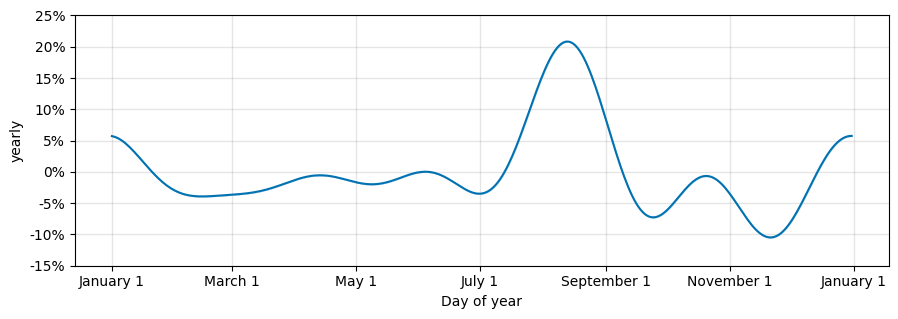

In [142]:
from prophet.plot import plot_yearly
plot_yearly(model, figsize=(10.5, 3.25))
plt.show()

Vemos que para o mês de agosto há um aumento de mais de 20% nas curtidas. E como suspeitamos, isso pode ser causado por esse evento especial, não recorrente. 



Vamos tratar esse período em específico. O Prophet lida muito bem com dados faltantes. Então, nesse caso, a solução simples seria remover esse período da base. Nesse comando abaixo, nś estamos criando um novo datafame sem os dados de agosto de 2016. Vamos executá-los.

In [143]:
df2 = df[(df['ds'] < '2016-07-29') | (df['ds'] > '2016-09-01')]
df2

,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000


## Rodando o nosso modelo novamente, e em seguida vamos visualizar a nossa sazonalidade. 

In [144]:

model = Prophet(seasonality_mode='multiplicative',yearly_seasonality=6)
model.fit(df2)
future = model.make_future_dataframe(periods=365 * 2)
future.head(5)


19:26:15 - cmdstanpy - INFO - Chain [1] start processing
19:26:15 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2012-03-24
1,2012-03-25
2,2012-03-26
3,2012-03-27
4,2012-03-28


In [145]:
forecast = model.predict(future)
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-03-24,-23214.473821,-104508.733913,57844.650143,-23214.473821,-23214.473821,0.027955,0.027955,0.027955,0.035058,0.035058,0.035058,-0.007103,-0.007103,-0.007103,0.0,0.0,0.0,-23863.431103
1,2012-03-25,-22970.118785,-104379.864989,59977.136687,-22970.118785,-22970.118785,0.021700,0.021700,0.021700,0.028257,0.028257,0.028257,-0.006556,-0.006556,-0.006556,0.0,0.0,0.0,-23468.579601
2,2012-03-26,-22725.763749,-102367.127894,58638.853363,-22725.763749,-22725.763749,-0.001387,-0.001387,-0.001387,0.004651,0.004651,0.004651,-0.006038,-0.006038,-0.006038,0.0,0.0,0.0,-22694.233592
3,2012-03-27,-22481.408713,-100910.813602,59840.534277,-22481.408713,-22481.408713,-0.035024,-0.035024,-0.035024,-0.029474,-0.029474,-0.029474,-0.005549,-0.005549,-0.005549,0.0,0.0,0.0,-21694.026024
4,2012-03-28,-22237.053678,-102295.027090,56977.081964,-22237.053678,-22237.053678,-0.030933,-0.030933,-0.030933,-0.025842,-0.025842,-0.025842,-0.005090,-0.005090,-0.005090,0.0,0.0,0.0,-21549.203915


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


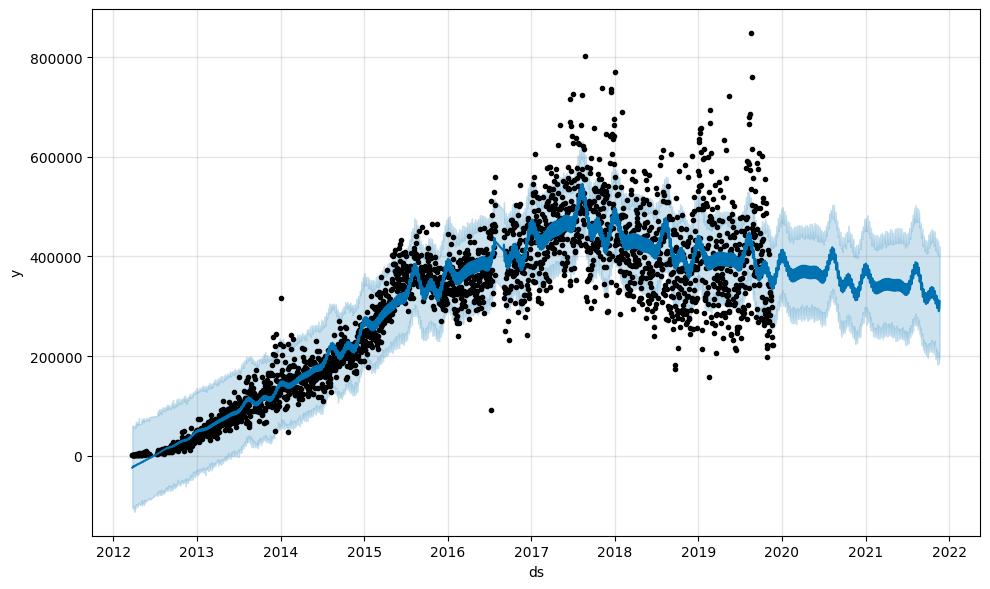

In [146]:
fig = model.plot(forecast)
plt.show()

In [147]:
# sazonalidade

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name + '_lower'],


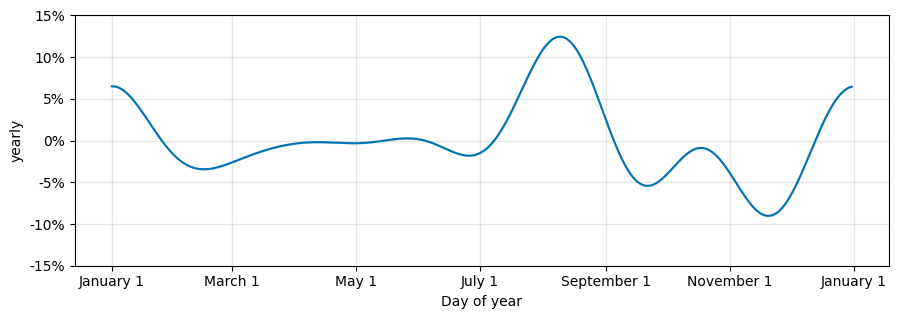

In [148]:
plot_yearly(model, figsize=(10.5, 3.25))
plt.show()



Sim, aqueles outliers para o mês de agosto, ele agora só está projetando um impacto de cerca de 10%, algo muito mais razoável e coerente. 

Esse é um exemplo quão importante é nós tratarmos os outliers das nossas séries temporais. 


# **Correção de outliers e efeitos intervalo de incerteza*

Nessa aula nós vamos visualizar como que esses eventos especiais podem influenciar o intervalo de incerteza. 


Para isso, vamos simular um problema nos nossos dados.

Vamos supor que durante o an ode 2015 a captura das observações de LIKE teve um problema e por um ano ficou limitada a 100 mil likes. 

In [149]:
df3 = df.copy()
df3.loc[df3['ds'].dt.year == 2016, 'y'] = 100000
df3

,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000


In [150]:
df3.loc[df3['ds'].dt.year == 2016]

,ds,y
1378,2016-01-01,100000.0
1379,2016-01-02,100000.0
1380,2016-01-03,100000.0
1381,2016-01-04,100000.0
1382,2016-01-05,100000.0
...,...,...
1739,2016-12-27,100000.0
1740,2016-12-28,100000.0
1741,2016-12-29,100000.0
1742,2016-12-30,100000.0


Criando um novo dataframe (3), nós estamos sobrescrevendo a informação para todos os dias do ano de 2016, com o valor de 100000. Vamos executá-lo e logo abaixo nós estamos instanciando o modelo, fazendo predict e visualizando com a função add_changepoints_to_plot. de forma padrão. 

Quando executamos o modelo, nós vemos que o intervalo de confiança está muito amplo.

Isso acontece porque, devido ao período problemático que temos em nossos dados, isso gera uma incerteza para o prophet sobre o que pode vir a acontecer no futuro.

19:26:16 - cmdstanpy - INFO - Chain [1] start processing
19:26:16 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


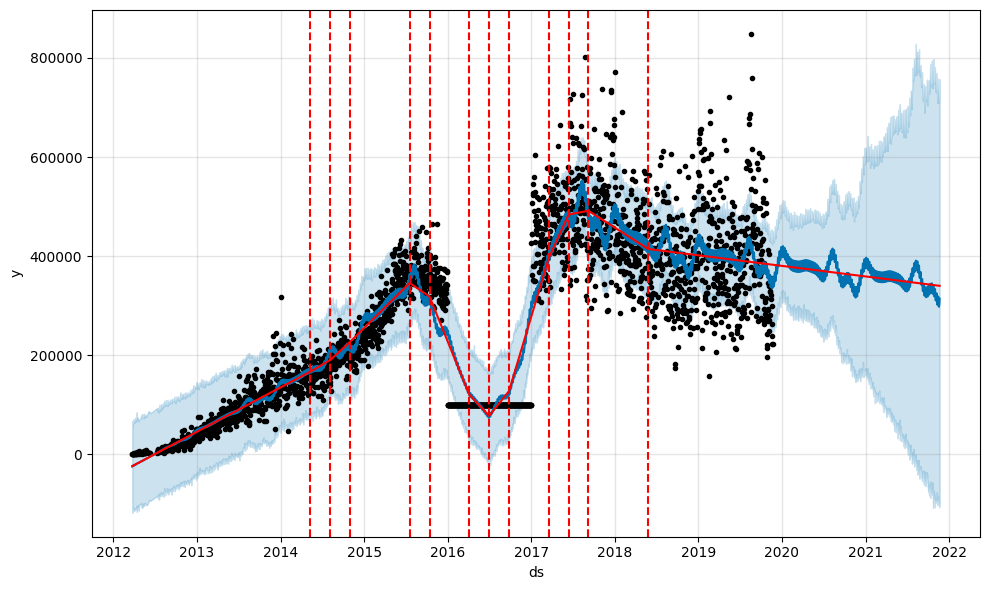

In [151]:

model = Prophet(seasonality_mode='multiplicative',yearly_seasonality=6)
model.fit(df3)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

A solução para esse caso, assim como no anterior, é apenas a remoção do período problemático. 

Então nós vamos nesse df3 sobrescrever todo  ano de 2016 por NONE. 

In [152]:
df3.loc[df3['ds'].dt.year == 2016, 'y'] = None
df3

,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000


In [153]:
df3.loc[df3['ds'].dt.year == 2016]

,ds,y
1378,2016-01-01,NaN
1379,2016-01-02,NaN
1380,2016-01-03,NaN
1381,2016-01-04,NaN
1382,2016-01-05,NaN
...,...,...
1739,2016-12-27,NaN
1740,2016-12-28,NaN
1741,2016-12-29,NaN
1742,2016-12-30,NaN


Vamos executar novamente o modelo

19:26:17 - cmdstanpy - INFO - Chain [1] start processing
19:26:17 - cmdstanpy - INFO - Chain [1] done processing
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


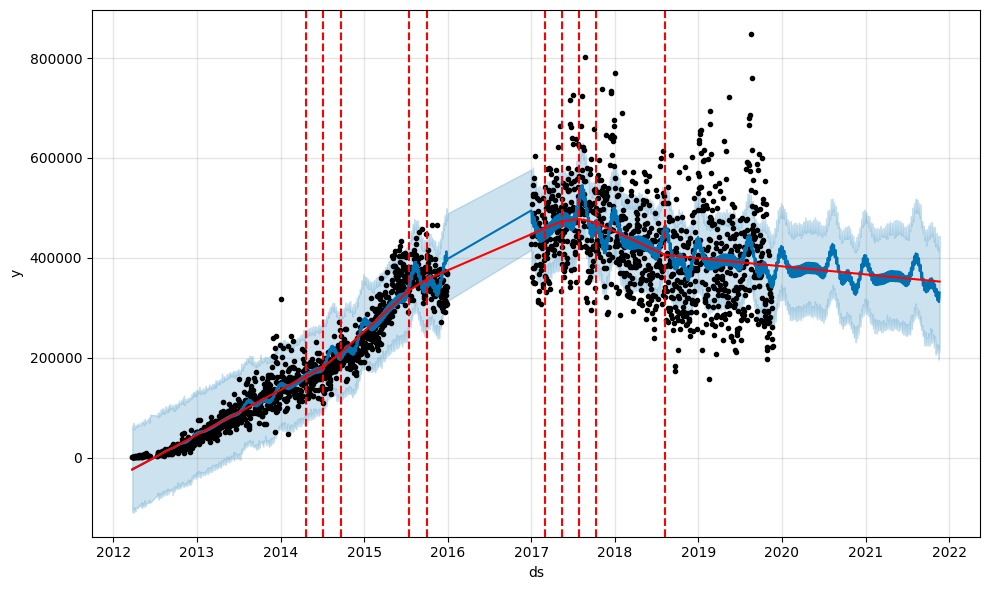

In [154]:

model = Prophet(seasonality_mode='multiplicative',yearly_seasonality=6)
model.fit(df3)
future = model.make_future_dataframe(periods=365 * 2)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()



Com isso, nós vemos que o nosso intervalo de confiança está ajustado. E para suprir os dados faltantes de 2016, o Prophet ainda fez uma preisão sore esse período. E com isso, aprendemos mais uma dica de como os outliers podem influenciar negativamente o seu modelo, alterando o intervalo de incerteza.

# **Detectando valores discrepantes aumaticamente**

https://github.com/marcosmlslira/Facebook-Prophet-Previsoes-de-Series-Temporais-com-Python/blob/main/outliers_removal.png

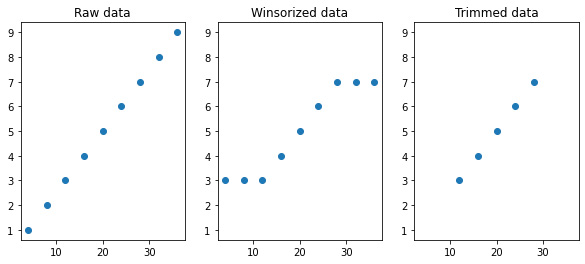!


até então resolvemos os nossos problemas com outliers através da inspeção manual, utilizando a nossa intuição.Mas, como o prophet foi desenvolvido para reduzir a carga de trabalho e automatizar o máximo possível de trabalho. Examinaremos algumas técnicas para identificar valores de outliers automaticamente. 

A primeira técnica é chamada de winsorization, em homenagem ao estatístico Charles P. Winsor. A Winsorization é uma ferramenta que tende a não funcionar muito bem com tendências não planas.  

Ela exige que o analista especifique um percentil e todos os dados acima ou abaixo daquele percentil, são forçados ao valor daquele percentil. É exatamente o que vemos no segundo quadro das figuras ou gráficos. 

- O primeiro gráico é o dado original, que vai de 1 ao 9. Só que no segundo gráfico, foi especificado um percentil superior e um inferior e qualquer valor abaixo ou acima daquilo assume aquele valor máximo. 

- O segundo método é aparar, ou o 'Trimmed data', que é uma técnica semelhante, exceto que os valores extremos são removidos e não substituídos por um outro valor.

Vamos olhar como aplica o winsorization nos nossos dados através do pacote scipy que possui o módulo stats, que por sua vez possui uma ferramenta que nos permite fazer a winsorization.

In [155]:
df

,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000


# Winsorization

In [156]:

from scipy import stats
df4 = df.copy().dropna()
df4

,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000


In [157]:
df4['y'] = stats.mstats.winsorize(df4['y'],limits=(0, .05), axis=0)
df4

,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000


Para a gente aplicar a winsorization, a gente chama o stats=> stats.mstats.winsorize e a coluna que nós desejamos fazer o tratamento, que no caso é a coluna y -> df4['y']

limits=(0, .05) -> segundo parâmetro será os percentis pelo qual a gente deseja restringir o valor. 
Como o limite inferior 0, nós não vamos restringir nada e nós vamos limiar os últimos 5 percentis da área superior = 0.05

axis=0

Agora vamos visualizar

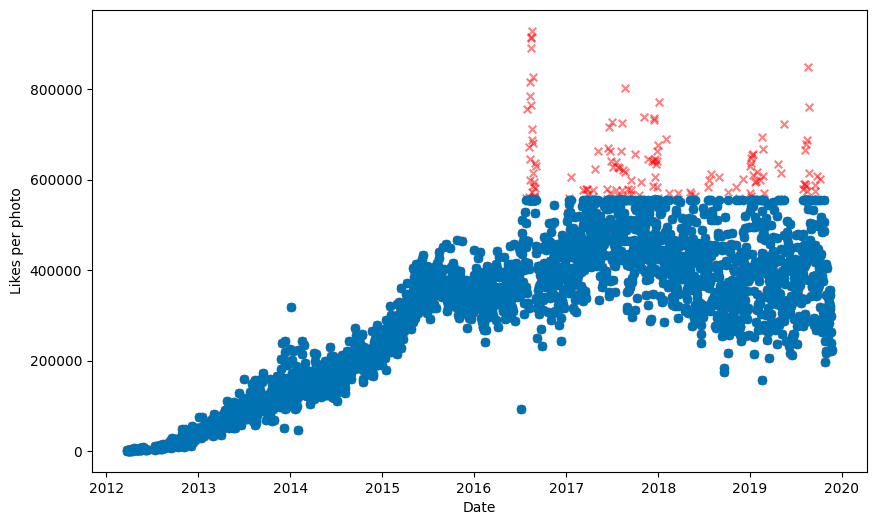

In [158]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df4['ds'], y=df4['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()



Nós temos 2 gráficos sobrepostos, o primeiro é o dado original, que tem esses x vermelhos e o segundo dado final, que acaba sobrepondo o x, em azul, é o que restou a partir do resultado da winsorization e a parte vermelha foi o que eliminamos.
Então vimos que todos os dados que foram agrupados, como esses valores máximos em vermelho para o azul, e obviamente esse método não funciona bem nos dados que têm tendência, porque conforme a tendência for aumentando, nós cortaremos dados que representam o comportamento real e não são eventos especiais. 

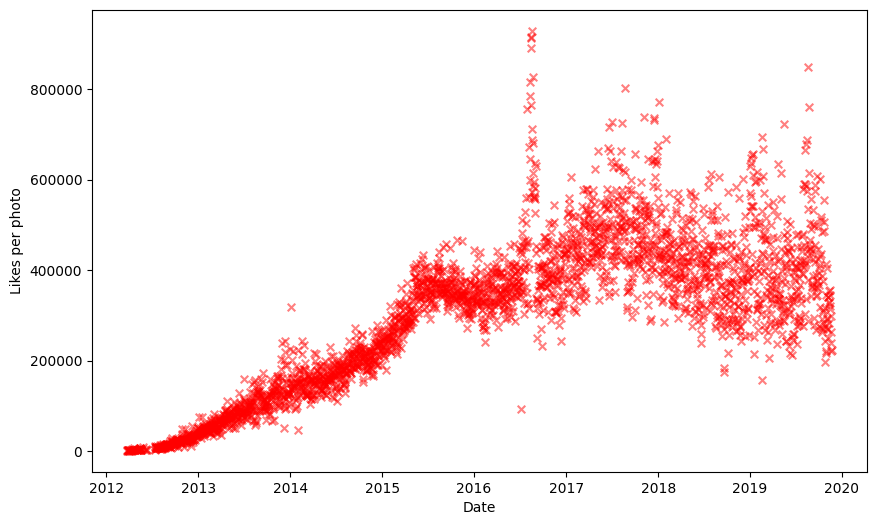

In [159]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
#plt.scatter(x=df4['ds'], y=df4['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

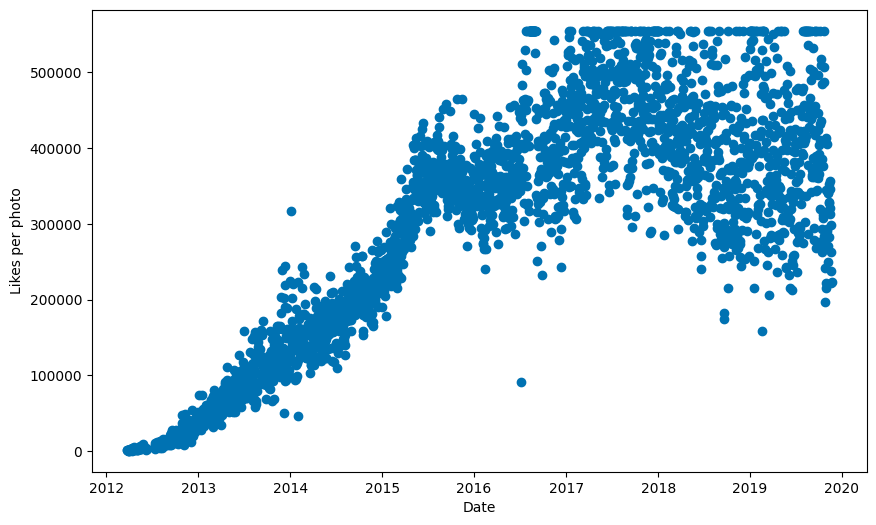

In [160]:
plt.figure(figsize=(10, 6))
#plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df4['ds'], y=df4['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

## Um segundo método que nós vamos analisar vai ser baseado no desvio padrão

# **Desvio Padrão**

Na Winsorization os limites são definidos com percentis, não há uma consideração de variação natural dos dados. Ou seja, tem alguns conjuntos que os dados são muito próximos do valor médio e não estão muito dispersos. Definir um limite percentual não levaria isso em consideração. Portanto, em vez de usar o percentil, às vezes faz mais sentido usar o desvio padrão que de alguma ele leva em consideração a dispersão dos dados de forma natural, para utilizar o método do desvio padrão. Nós também vamos utilizar a biblioteca stats, só que utilizando o método <b>zscore</b>.

### Aqui nós estamos removendo tudo o que tem um desvio padrão maior que 1,65. 

In [161]:
df

,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000


In [162]:
df5 = df.copy().dropna()
df5 = df5[(stats.zscore(df5['y']) < 1.65)]

df5

,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000


In [163]:
(stats.zscore(df5['y']))

0      -1.860254
1      -1.855922
2      -1.858578
3      -1.861931
4      -1.858082
          ...   
2794    0.081153
2795   -0.421393
2796   -0.316820
2797   -0.156369
2798   -0.414327
Name: y, Length: 2613, dtype: float64

Mas aqui a gente já não teve um corte tão seco, houve uma certa variação aqui, considerando o desvio padrão do dado. Aqui nós vemos que realmente foi uma reta. 

Vale ressalta que também esse método ainda não funciona da forma ideal para dados que possuem uma tendência. 

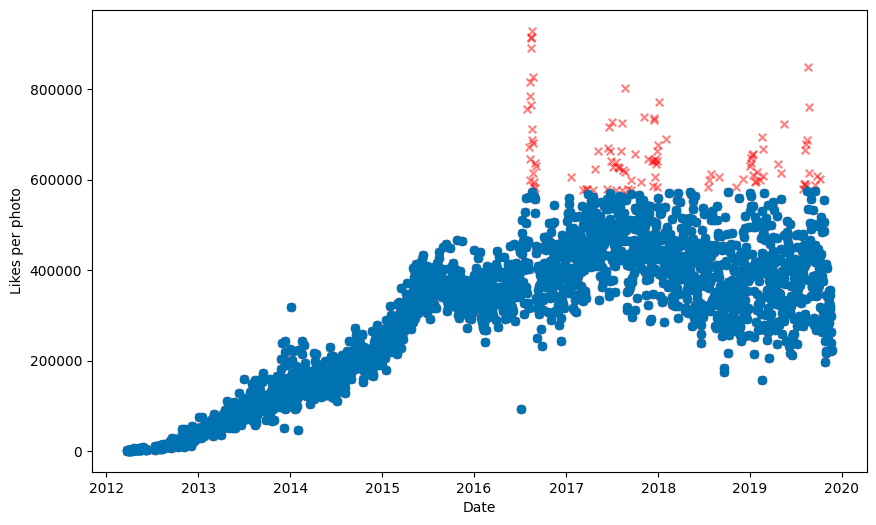

In [164]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df5['ds'], y=df5['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

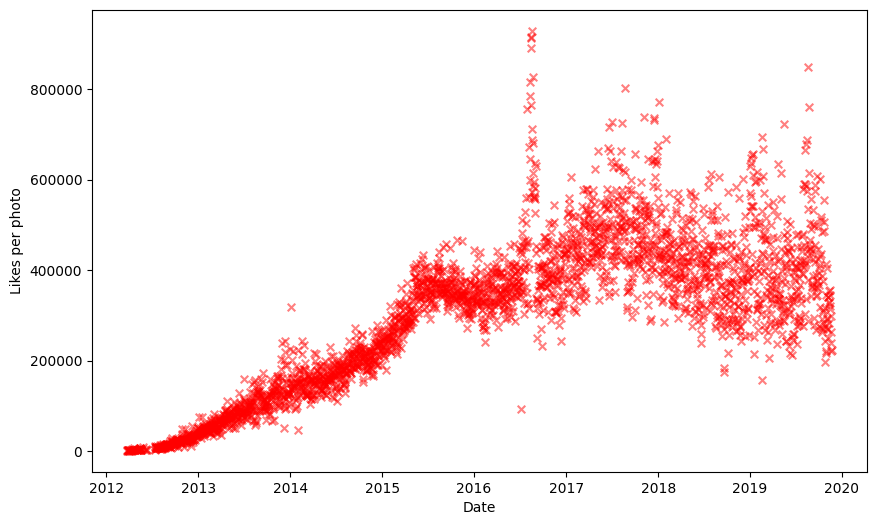

In [165]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
#plt.scatter(x=df5['ds'], y=df5['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()


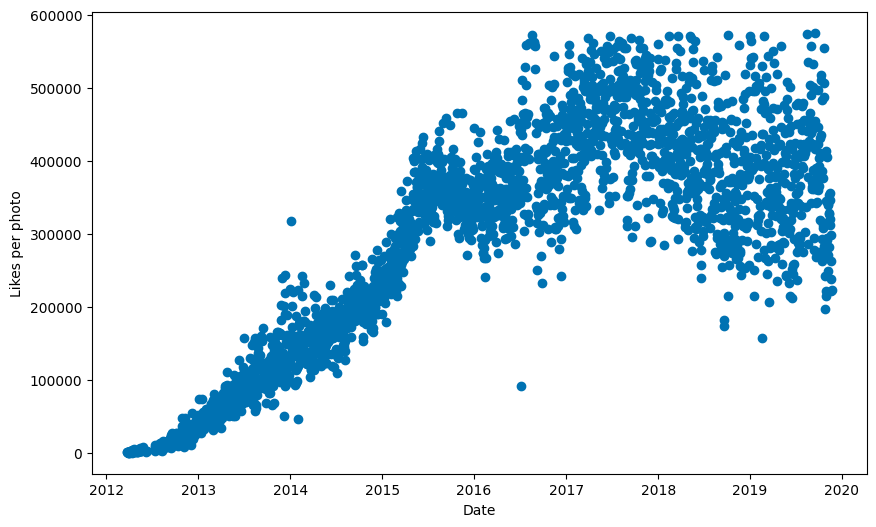

In [166]:
plt.figure(figsize=(10, 6))
#plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df5['ds'], y=df5['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()

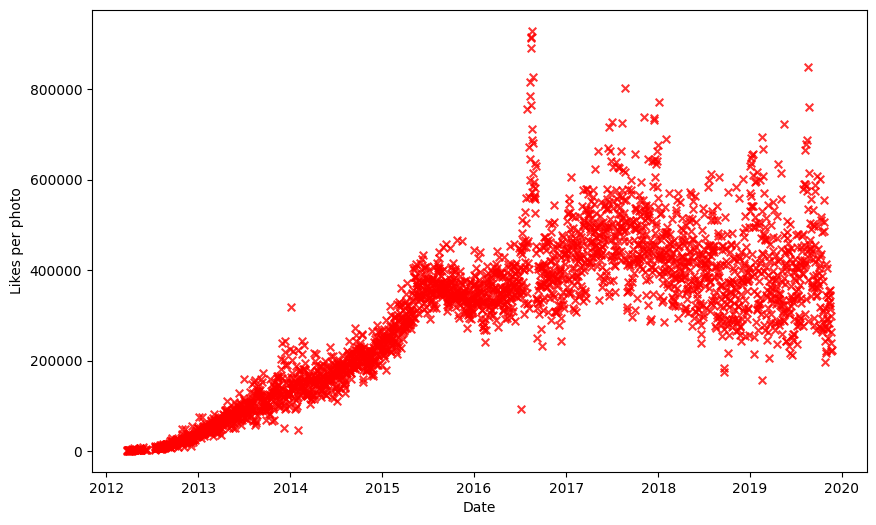

In [167]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.8, marker='x', s=30) #alpha 80%
#plt.scatter(x=df5['ds'], y=df5['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()



O próximo método para remoção de outliers seria utilizando as médias móveis. No exemplo anterior, nós utilizamos o desvio padrão com relação a todo o conjunto e por isso ele não se ajusta bem quando há uma tendência. Nesse exemplo nós removeremos os limites inferiores e superiores também usando o valor de 1,5, no desvio padrão como antes. 

# Média Móvel

Vamos utilizar uma janela móvel utilizanod os 300 últimos períodos, o que fará com que nós sejamos mais justos na remoção dos outliers. Vamos ver o resultado disso. 

Aqui nós criamos a nossa base com a média móvel superior e a média móvel inferior. 

In [168]:
df6 = df.copy().dropna()
df6['moving_average'] = df6.rolling(window=300,
                                    min_periods=1,
                                    center=True,
                                    on='ds')['y'].mean()

In [169]:
df6['std_dev'] = df6.rolling(window=300,
                            min_periods=1,
                            center=True,
                            on='ds')['y'].std()

In [170]:

df6['lower'] = df6['moving_average'] - 1.65 * \
               df6['std_dev']
df6['upper'] = df6['moving_average'] + 1.65 * \
              df6['std_dev']
df6 = df6[(df6['y'] < df6['upper']) & \
          (df6['y'] > df6['lower'])]

In [171]:
df6

,ds,y,moving_average,std_dev,lower,upper
0,2012-03-24,1043.000000,10320.861511,7333.699526,-1779.742707,22421.465730
1,2012-03-25,1707.666667,10437.975011,7449.539970,-1853.765940,22729.715962
2,2012-03-26,1300.142857,10474.210702,7438.259526,-1798.917517,22747.338920
3,2012-03-27,785.666667,10611.483834,7605.710053,-1937.937752,23160.905421
4,2012-03-28,1376.200000,10788.253420,7891.822000,-2233.252880,23809.759720
...,...,...,...,...,...,...
2794,2019-11-17,298953.750000,394813.111735,113724.710413,207167.339553,582458.883917
2795,2019-11-18,221837.500000,395783.235116,113450.478845,208589.945022,582976.525209
2796,2019-11-19,237884.375000,395779.288940,113823.048813,207971.258398,583587.319481
2797,2019-11-20,262505.750000,396222.937551,114066.525204,208013.170964,584432.704138


## Plotando o método

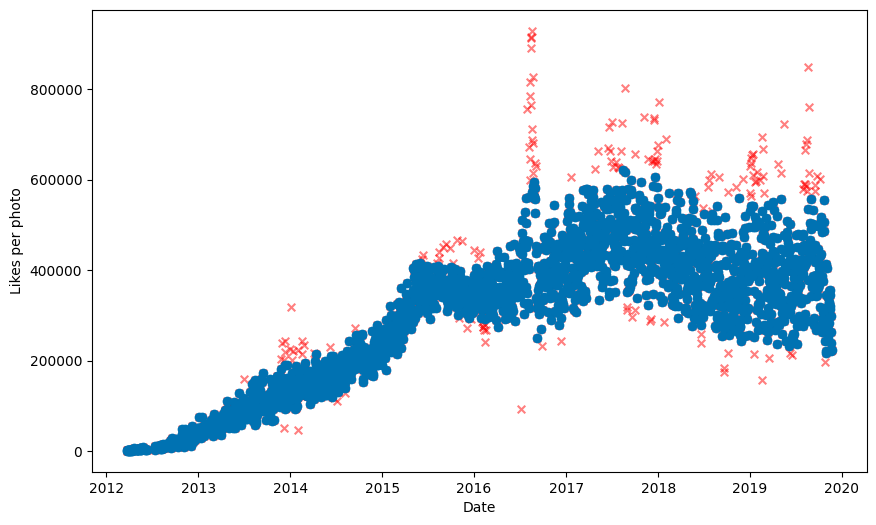

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df6['ds'], y=df6['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()


Vemos aqui que ele teve uma remoção muito mais coerente. Porque, ao invés de um valor estático como na Winsorization, ou o valor globa, como o desvio padrão de toda a série temporal, ele está aplicando a remoção com base no desvio padrão de uma pequena janela móvel que vai andando localmente. Ou seja, a janela móvel desse período (em torno de 2016) não está levando em consideração a média desse outro período (em torno de 2013 e 2014), que é muito mais baixo. Então ele está aplicando a remoção de uma forma muito mais contextualizada.  

# Intervalo de Confiança

Um outro método que veremos é utilizando o próprio intervalo de confiança gerado pelo Prophet. 

Assim, esse é de longe o método mais robusto que nós temos à disposição utilizando o Prophet. Basicamente, esse método consiste em utilizarmos os campos de yhat_upper e yhat_lower que existem no dataframe de predição para definir como o nosso limite de outliers. Considerando que tudo além dele seria um valor inesperado ou um valor que não faz sentido para aquela série. 

E o Prophet é muito mais robusto para fazer esse procedimento do que a média móvel em si, porque além do desvio padrão e janelas deslizantes, ele leva em consideração muitos outros fatores, como a sazonalidade, feriados e outras informações que estejam incluídas no modelo.  

In [173]:
df7 = df.copy().dropna().reset_index()
df7

,index,ds,y
0,0,2012-03-24,1043.000000
1,1,2012-03-25,1707.666667
2,2,2012-03-26,1300.142857
3,3,2012-03-27,785.666667
4,4,2012-03-28,1376.200000
...,...,...,...
2709,2794,2019-11-17,298953.750000
2710,2795,2019-11-18,221837.500000
2711,2796,2019-11-19,237884.375000
2712,2797,2019-11-20,262505.750000


In [174]:
# rodamos o modelo com os parâmetros desejados 
model = Prophet(seasonality_mode='multiplicative',
                yearly_seasonality=6,
                seasonality_prior_scale=.01,
                changepoint_prior_scale=.01,
                interval_width=.90)

In [175]:
model.fit(df7)
forecast = model.predict()[:len(df7)]
forecast

19:47:03 - cmdstanpy - INFO - Chain [1] start processing
19:47:03 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2012-03-24,-36642.258471,-149001.959470,81790.948963,-36642.258471,-36642.258471,0.009411,0.009411,0.009411,0.026557,0.026557,0.026557,-0.017147,-0.017147,-0.017147,0.0,0.0,0.0,-36987.096168
1,2012-03-25,-36357.100661,-154429.786694,79972.530719,-36357.100661,-36357.100661,0.005234,0.005234,0.005234,0.021542,0.021542,0.021542,-0.016308,-0.016308,-0.016308,0.0,0.0,0.0,-36547.380720
2,2012-03-26,-36071.942850,-152048.969996,75967.897617,-36071.942850,-36071.942850,-0.011479,-0.011479,-0.011479,0.003975,0.003975,0.003975,-0.015454,-0.015454,-0.015454,0.0,0.0,0.0,-35657.859055
3,2012-03-27,-35786.785040,-150215.656124,84252.178140,-35786.785040,-35786.785040,-0.038280,-0.038280,-0.038280,-0.023690,-0.023690,-0.023690,-0.014591,-0.014591,-0.014591,0.0,0.0,0.0,-34416.853863
4,2012-03-28,-35501.627229,-138264.049183,76624.181399,-35501.627229,-35501.627229,-0.033611,-0.033611,-0.033611,-0.019887,-0.019887,-0.019887,-0.013724,-0.013724,-0.013724,0.0,0.0,0.0,-34308.376210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709,2019-11-17,373760.246623,239758.590636,474167.406370,373760.246623,373760.246623,-0.052986,-0.052986,-0.052986,0.021542,0.021542,0.021542,-0.074528,-0.074528,-0.074528,0.0,0.0,0.0,353956.268908
2710,2019-11-18,373653.300705,237674.519099,460465.044634,373653.300705,373653.300705,-0.072024,-0.072024,-0.072024,0.003975,0.003975,0.003975,-0.075999,-0.075999,-0.075999,0.0,0.0,0.0,346741.298745
2711,2019-11-19,373546.354787,219111.125532,438221.235460,373546.354787,373546.354787,-0.100809,-0.100809,-0.100809,-0.023690,-0.023690,-0.023690,-0.077119,-0.077119,-0.077119,0.0,0.0,0.0,335889.526529
2712,2019-11-20,373439.408869,224599.563919,456264.483794,373439.408869,373439.408869,-0.097762,-0.097762,-0.097762,-0.019887,-0.019887,-0.019887,-0.077874,-0.077874,-0.077874,0.0,0.0,0.0,336931.386604


Estamos fazendo a remoção de todos os valores que excedem o yhat_lower e o yhat_upper

In [176]:
df8 = df7[(df7['y'] > forecast['yhat_lower']) & (df7['y'] < forecast['yhat_upper'])]
df8

,index,ds,y
0,0,2012-03-24,1043.000000
1,1,2012-03-25,1707.666667
2,2,2012-03-26,1300.142857
3,3,2012-03-27,785.666667
4,4,2012-03-28,1376.200000
...,...,...,...
2707,2792,2019-11-15,356000.500000
2708,2793,2019-11-16,320722.750000
2709,2794,2019-11-17,298953.750000
2711,2796,2019-11-19,237884.375000


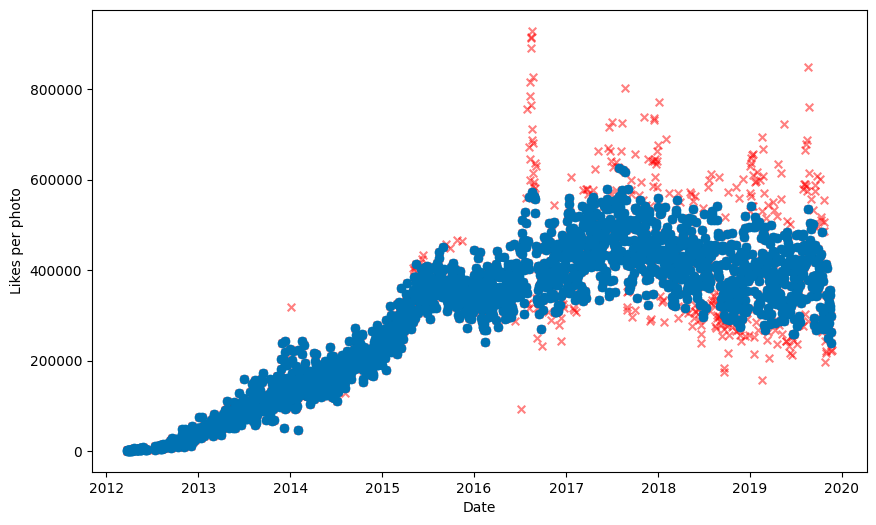

In [177]:
plt.figure(figsize=(10, 6))
plt.scatter(x=df['ds'], y=df['y'], c='r', alpha=.5, marker='x', s=30)
plt.scatter(x=df8['ds'], y=df8['y'], c='#0072B2')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('Likes per photo')
plt.show()


Aqui nós vemos que conseguimos reduzir de forma muito mais precisa os pontos. 

# **Modelando Outliers como eventos especiais*

última maneira para trabalharmos com outliers com o Prophet. Uma técnica que já utilizamos nos dados do James Rodrigues, que são os feriados. Isso mesmo, nós podemos declarar os outliers como se fosse um evento especial, especialmente um feriado. Com isso, nós estamos instruindo ao Prophet que aquele dado não é um outlier em si, mas quel ele deve aplicar uma tendência e sazonalidade diferenciada para aquele dia. É como se estivéssemos isolando aquele efeito. 

Com isso, basta não especificarmos os valores futuros daquele feriado que nós sabemos que não é um feriado. Na verdade, foi algum evento externo que gerou um comportamento fora da curva que o prophet não voltará a repetir aquele efeito. 

### Isso é especialmente útil se você souber que efetivamente aquilo não vai voltar a acontecer, porque foi uma situação muito específica. Então nós usaremos aqui novamente os dados do national geographic, mas dessa vez nós vamos rotular o agosto de 2016 como feriado. 

In [178]:
df_ng = pd.read_csv('instagram_natgeo.csv')
display(df_ng.head(5))
df_ng['Date'] = pd.to_datetime(df_ng['Date'])
df_ng.columns = ['ds', 'y']
df_ng

,Date,Average Likes Per Photo
0,3/24/2012,1043.000000
1,3/25/2012,1707.666667
2,3/26/2012,1300.142857
3,3/27/2012,785.666667
4,3/28/2012,1376.200000


,ds,y
0,2012-03-24,1043.000000
1,2012-03-25,1707.666667
2,2012-03-26,1300.142857
3,2012-03-27,785.666667
4,2012-03-28,1376.200000
...,...,...
2794,2019-11-17,298953.750000
2795,2019-11-18,221837.500000
2796,2019-11-19,237884.375000
2797,2019-11-20,262505.750000



Criamos um dataframe que vai conter todos os dias de agosto e nós vamos especificar no nosso modelo como feriado. 

In [179]:
promo = pd.DataFrame({
    'holiday': 'Promo event',
    'ds': pd.to_datetime(['2016-07-29']),
    'lower_window': 0,
    'upper_window': 34,
    })

In [180]:
promo

,holiday,ds,lower_window,upper_window
0,Promo event,2016-07-29,0,34


In [181]:
model = Prophet(seasonality_mode='multiplicative', holidays=promo,
                yearly_seasonality=6)
model.fit(df_ng)

20:09:00 - cmdstanpy - INFO - Chain [1] start processing
20:09:00 - cmdstanpy - INFO - Chain [1] done processing


In [183]:
future = model.make_future_dataframe(periods=365 * 2)
display(future.tail(10))
forecast = model.predict(future)
display(forecast.tail(10))

,ds
3434,2021-11-11
3435,2021-11-12
3436,2021-11-13
3437,2021-11-14
3438,2021-11-15
3439,2021-11-16
3440,2021-11-17
3441,2021-11-18
3442,2021-11-19
3443,2021-11-20


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Promo event,Promo event_lower,Promo event_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
3434,2021-11-11,334945.032521,191379.779106,414900.678712,257412.420742,421950.563793,0.0,0.0,0.0,0.0,...,-0.010749,-0.010749,-0.010749,-0.076569,-0.076569,-0.076569,0.0,0.0,0.0,305698.281356
3435,2021-11-12,334881.872847,199545.333039,424949.642208,257200.253656,422013.675319,0.0,0.0,0.0,0.0,...,-0.001735,-0.001735,-0.001735,-0.079548,-0.079548,-0.079548,0.0,0.0,0.0,307661.662170
3436,2021-11-13,334818.713172,210975.659345,437788.078616,256981.752761,422064.533325,0.0,0.0,0.0,0.0,...,0.035049,0.035049,0.035049,-0.082262,-0.082262,-0.082262,0.0,0.0,0.0,319011.025654
3437,2021-11-14,334755.553497,196416.417867,436333.841487,256763.251865,422115.391330,0.0,0.0,0.0,0.0,...,0.028123,0.028123,0.028123,-0.084684,-0.084684,-0.084684,0.0,0.0,0.0,315821.669769
3438,2021-11-15,334692.393823,201869.546882,418777.422477,256544.750970,422166.249336,0.0,0.0,0.0,0.0,...,0.004642,0.004642,0.004642,-0.086787,-0.086787,-0.086787,0.0,0.0,0.0,307198.995311
3439,2021-11-16,334629.234148,184548.248545,400779.848377,256249.402362,422217.107342,0.0,0.0,0.0,0.0,...,-0.029476,-0.029476,-0.029476,-0.088549,-0.088549,-0.088549,0.0,0.0,0.0,295134.591366
3440,2021-11-17,334566.074473,191390.321722,409709.462198,255920.537335,422267.965348,0.0,0.0,0.0,0.0,...,-0.025853,-0.025853,-0.025853,-0.089948,-0.089948,-0.089948,0.0,0.0,0.0,295822.803100
3441,2021-11-18,334502.914799,196374.438255,406895.292359,255651.781669,422318.823354,0.0,0.0,0.0,0.0,...,-0.010749,-0.010749,-0.010749,-0.090968,-0.090968,-0.090968,0.0,0.0,0.0,300478.374227
3442,2021-11-19,334439.755124,192861.638630,421239.849821,255383.026004,422369.681359,0.0,0.0,0.0,0.0,...,-0.001735,-0.001735,-0.001735,-0.091592,-0.091592,-0.091592,0.0,0.0,0.0,303227.551641
3443,2021-11-20,334376.595449,201158.982802,436911.194823,255124.239077,422420.539365,0.0,0.0,0.0,0.0,...,0.035049,0.035049,0.035049,-0.091808,-0.091808,-0.091808,0.0,0.0,0.0,315397.737218


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


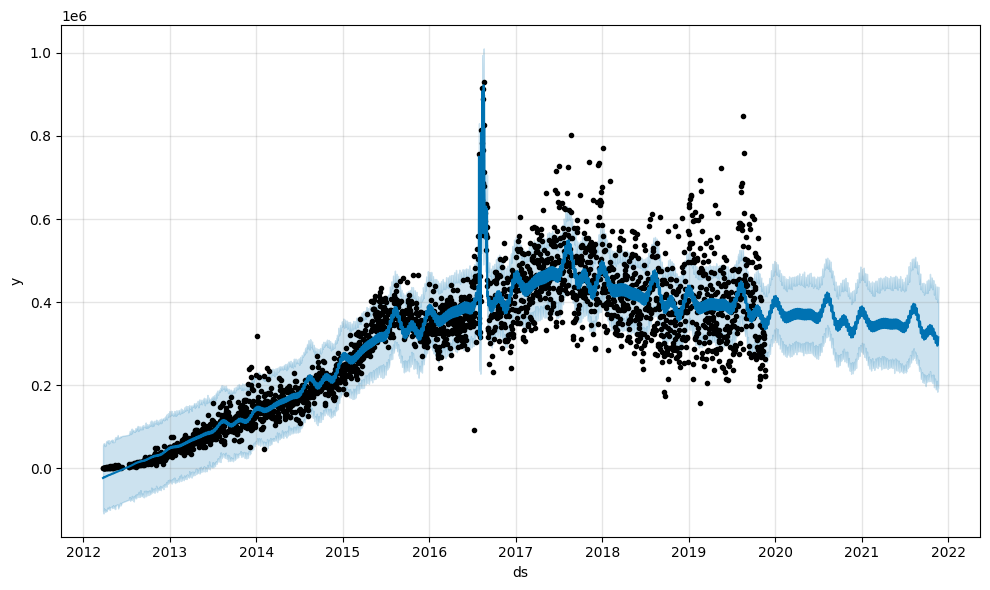

In [184]:
fig = model.plot(forecast)
plt.show()

# Com isso, nós podemos ver aqui que o Prophet não distorceu o intervalo de confiança. E o modelo atual conseguiu isolar muito bem o comportamento que tivemos aqui em agosto, como um evento pontual. 


Se nós tivéssemos projetado mais datas futuras aqui, para esse evento, a gente conseguiria, por exemplo, simular como que seria esse evento se acontecesse novamente. 
Mas, como não é o nosso caso, nós entendemos que isso aqui seria um evento específico que nunca mais voltará a acontecer, ou arrepender. Nós conseguimos neutralizar o seu efeito na nossa série temporal. 

In [186]:
future = model.make_future_dataframe(periods=365 * 8)
display(future.tail(10))
forecast = model.predict(future)
display(forecast.tail(10))

,ds
5624,2027-11-10
5625,2027-11-11
5626,2027-11-12
5627,2027-11-13
5628,2027-11-14
5629,2027-11-15
5630,2027-11-16
5631,2027-11-17
5632,2027-11-18
5633,2027-11-19


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Promo event,Promo event_lower,Promo event_upper,holidays,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
5624,2027-11-10,196625.345046,-478774.897678,784886.591761,-527263.606637,864828.248855,0.0,0.0,0.0,0.0,...,-0.025853,-0.025853,-0.025853,-0.071670,-0.071670,-0.071670,0.0,0.0,0.0,177449.810453
5625,2027-11-11,196562.185371,-503194.493043,805630.575991,-527759.908831,865138.156668,0.0,0.0,0.0,0.0,...,-0.010749,-0.010749,-0.010749,-0.074989,-0.074989,-0.074989,0.0,0.0,0.0,179709.216832
5626,2027-11-12,196499.025697,-504643.981247,790085.394388,-528256.211026,865448.064482,0.0,0.0,0.0,0.0,...,-0.001735,-0.001735,-0.001735,-0.078090,-0.078090,-0.078090,0.0,0.0,0.0,180813.516173
5627,2027-11-13,196435.866022,-517683.802901,830400.766185,-528752.513220,865757.972295,0.0,0.0,0.0,0.0,...,0.035049,0.035049,0.035049,-0.080940,-0.080940,-0.080940,0.0,0.0,0.0,187421.328875
5628,2027-11-14,196372.706348,-504432.129785,814080.617783,-529248.815414,866067.880108,0.0,0.0,0.0,0.0,...,0.028123,0.028123,0.028123,-0.083511,-0.083511,-0.083511,0.0,0.0,0.0,185496.062088
5629,2027-11-15,196309.546673,-496988.701363,804581.258202,-529745.117608,866377.787922,0.0,0.0,0.0,0.0,...,0.004642,0.004642,0.004642,-0.085776,-0.085776,-0.085776,0.0,0.0,0.0,180381.993975
5630,2027-11-16,196246.386998,-483290.174846,783199.881611,-530241.419803,866687.695735,0.0,0.0,0.0,0.0,...,-0.029476,-0.029476,-0.029476,-0.087712,-0.087712,-0.087712,0.0,0.0,0.0,173248.623253
5631,2027-11-17,196183.227324,-476862.178618,777954.033124,-530737.721997,866997.603548,0.0,0.0,0.0,0.0,...,-0.025853,-0.025853,-0.025853,-0.089295,-0.089295,-0.089295,0.0,0.0,0.0,173593.073927
5632,2027-11-18,196120.067649,-494051.964007,786406.530942,-531234.024191,867307.511362,0.0,0.0,0.0,0.0,...,-0.010749,-0.010749,-0.010749,-0.090506,-0.090506,-0.090506,0.0,0.0,0.0,176261.811962
5633,2027-11-19,196056.907974,-501416.891645,780639.799785,-531730.326386,867617.419175,0.0,0.0,0.0,0.0,...,-0.001735,-0.001735,-0.001735,-0.091330,-0.091330,-0.091330,0.0,0.0,0.0,177810.855742


/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


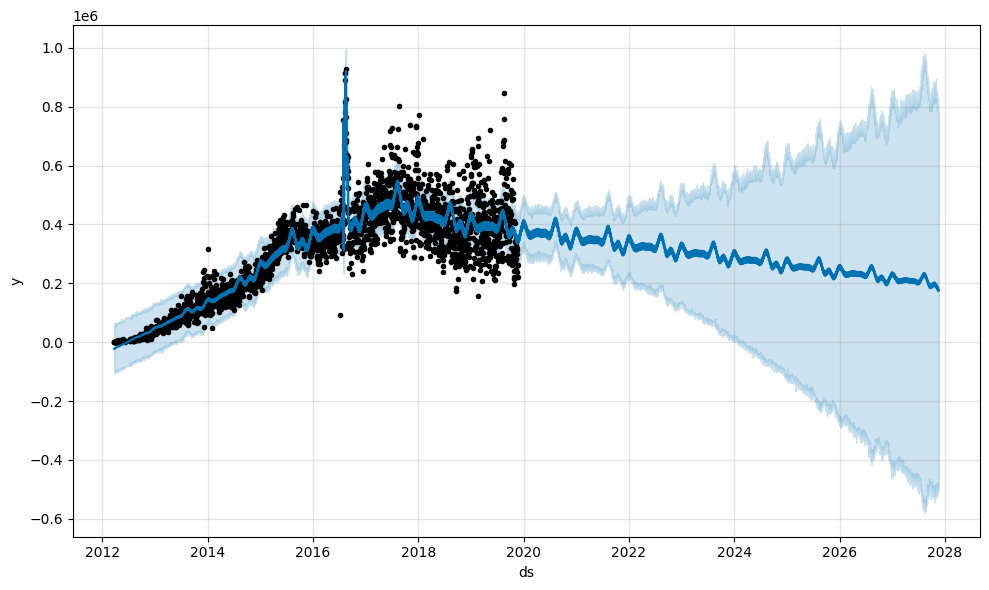

In [187]:
fig = model.plot(forecast)
plt.show()